# Performance Comparison

In [2]:
# Comparing key metrics: avg. downtime per shift, avg. reject rate per shift across different shift_display_name or team_display_name

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
device_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\DeviceProperty.csv")
prod_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\ProductionMetric.csv")
quality_df = pd.read_csv(r"C:\Olivia\Data Analytics\Junior Data Analyst Interview Project\Quality.csv")
prod_df

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,0.000000,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,0.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5420551,Line3,2025-01-17 11:26:05.5650680 -06:00,2025-01-17 11:29:11.4843000 -06:00,0,0,0.000000,0.000000,185.919232,0.0,185.919232,Unplanned Stop,Down,No Bottles,Part F-3000,Part F,First Shift,Team 1
9996,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1
9997,5420543,Line3,2025-01-17 11:16:22.5533940 -06:00,2025-01-17 11:19:12.1559110 -06:00,0,0,0.000000,0.000000,169.602517,0.0,169.602517,Unplanned Stop,Down,Random Inspection,Part F-3000,Part F,First Shift,Team 1
9998,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1


In [5]:
# avg. downtime per shift & avg. reject rate per shift
# downtime = unplanned_stop_time + planned_stop_time in min
prod_df['total_downtime'] = prod_df['planned_stop_time'] + prod_df['unplanned_stop_time']
avg_downtime_per_shift = prod_df.groupby('shift_display_name')['total_downtime'].mean().reset_index()
# multiplying by 100 to get percentage
prod_df['reject_rate'] = (prod_df['reject_count']/(prod_df['good_count']+prod_df['reject_count'])*100)
avg_rejects_per_shift = prod_df.groupby('shift_display_name')['reject_rate'].mean().reset_index()
print(avg_downtime_per_shift)
print(avg_rejects_per_shift)

  shift_display_name  total_downtime
0        First Shift       63.439933
1           No Shift        0.000000
2       Second Shift       61.869972
3        Third Shift       62.846622
4      Unknown Shift        0.000000
  shift_display_name  reject_rate
0        First Shift          inf
1           No Shift          0.0
2       Second Shift          inf
3        Third Shift          inf
4      Unknown Shift          0.0


In [6]:
# inf because dividing by zero 
# importing numpy to assign any zeros as nan to not include in calculation
import numpy as np 
prod_df['total_downtime'] = prod_df['planned_stop_time'] + prod_df['unplanned_stop_time']
prod_df['reject_rate'] = np.where(
    (prod_df['good_count']+prod_df['reject_count']) == 0, 
    np.nan,
    ((prod_df['reject_count']/(prod_df['good_count']+prod_df['reject_count']))*100)
    )
avg_downtime_per_shift = prod_df.groupby('shift_display_name')['total_downtime'].mean().reset_index()
avg_rejects_per_shift = prod_df.groupby('shift_display_name')['reject_rate'].mean().reset_index()
print(avg_downtime_per_shift)
print(avg_rejects_per_shift)

  shift_display_name  total_downtime
0        First Shift       63.439933
1           No Shift        0.000000
2       Second Shift       61.869972
3        Third Shift       62.846622
4      Unknown Shift        0.000000
  shift_display_name  reject_rate
0        First Shift     6.116253
1           No Shift     0.000000
2       Second Shift     4.635060
3        Third Shift     5.760385
4      Unknown Shift     0.000000


<Axes: xlabel='shift_display_name', ylabel='total_downtime'>

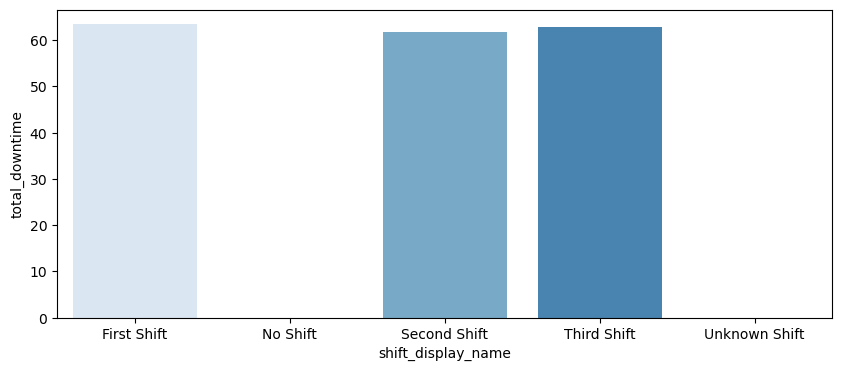

In [7]:
# visualizing the data into separate barplots 
# previewing it as usual
plt.figure(figsize=(10,4))
sns.barplot(data=avg_downtime_per_shift, x='shift_display_name', y='total_downtime', hue='shift_display_name', palette='Blues', legend=False)

Text(0, 0.5, 'Avg. Downtime')

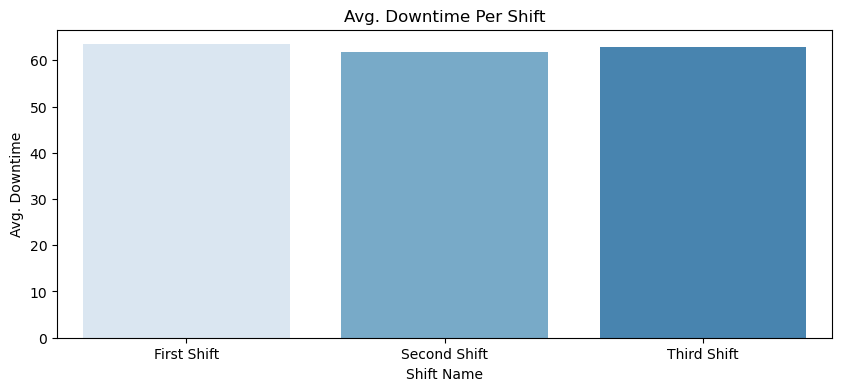

In [8]:
# changing shift order
shift_order = ['First Shift', 'Second Shift', 'Third Shift']
plt.figure(figsize=(10,4))
# fixing formatting because it was getting too long
sns.barplot(
    data=avg_downtime_per_shift, 
    x='shift_display_name', 
    y='total_downtime', 
    hue='shift_display_name', 
    palette='Blues', 
    order=shift_order, 
    legend=False
)
plt.title('Avg. Downtime Per Shift')
plt.xlabel('Shift Name')
plt.ylabel('Avg. Downtime')

<Axes: xlabel='shift_display_name', ylabel='reject_rate'>

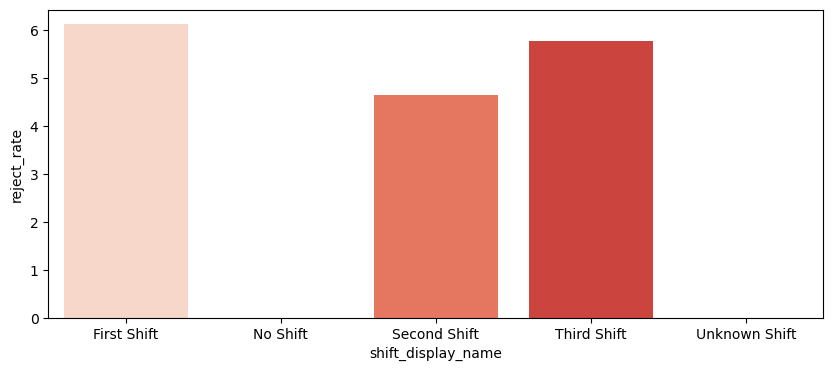

In [9]:
# visualizng the avg. rejects per shift
# previewing first
plt.figure(figsize=(10,4))
sns.barplot(data=avg_rejects_per_shift, x='shift_display_name', y='reject_rate', hue='shift_display_name', palette='Reds', legend=False)

Text(0, 0.5, 'Avg. Reject Rate (%)')

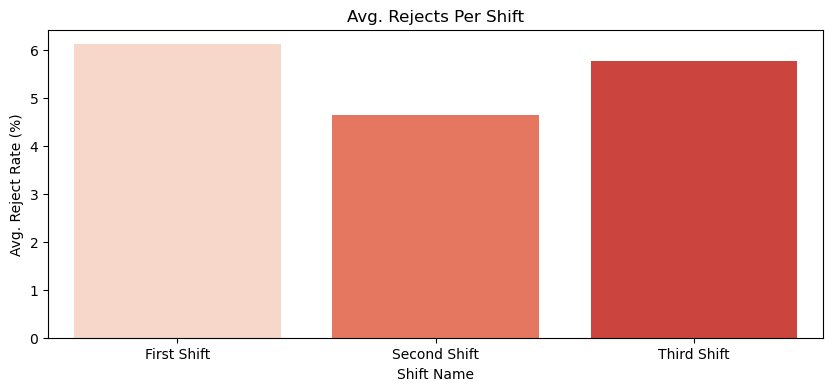

In [10]:
# final visual
shift_order = ['First Shift', 'Second Shift', 'Third Shift']
plt.figure(figsize=(10,4))
sns.barplot(
    data=avg_rejects_per_shift, 
    x='shift_display_name', 
    y='reject_rate', 
    hue='shift_display_name', 
    palette='Reds', 
    order=shift_order,
    legend=False
)
plt.title('Avg. Rejects Per Shift')
plt.xlabel('Shift Name')
plt.ylabel('Avg. Reject Rate (%)')